In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Exploratory Data Analysis

In [2]:
data = pd.read_csv('used_cars_dataset_v2.csv')
data.head(5)

,Brand,model,Year,Age,kmDriven,Transmission,Owner,FuelType,PostedDate,AdditionInfo,AskPrice
0,Honda,City,2001,23,"98,000 km",Manual,second,Petrol,Nov-24,"Honda City v teck in mint condition, valid gen...","₹ 1,95,000"
1,Toyota,Innova,2009,15,190000.0 km,Manual,second,Diesel,Jul-24,"Toyota Innova 2.5 G (Diesel) 7 Seater, 2009, D...","₹ 3,75,000"
2,Volkswagen,VentoTest,2010,14,"77,246 km",Manual,first,Diesel,Nov-24,"Volkswagen Vento 2010-2013 Diesel Breeze, 2010...","₹ 1,84,999"
3,Maruti Suzuki,Swift,2017,7,"83,500 km",Manual,second,Diesel,Nov-24,Maruti Suzuki Swift 2017 Diesel Good Condition,"₹ 5,65,000"
4,Maruti Suzuki,Baleno,2019,5,"45,000 km",Automatic,first,Petrol,Nov-24,"Maruti Suzuki Baleno Alpha CVT, 2019, Petrol","₹ 6,85,000"


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         14993 non-null  object
 1   model         14993 non-null  object
 2   Year          14993 non-null  int64 
 3   Age           14993 non-null  int64 
 4   kmDriven      14905 non-null  object
 5   Transmission  14993 non-null  object
 6   Owner         14993 non-null  object
 7   FuelType      14993 non-null  object
 8   PostedDate    14993 non-null  object
 9   AdditionInfo  14993 non-null  object
 10  AskPrice      14993 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.3+ MB


In [4]:
data.drop(columns=['AdditionInfo'], inplace=True)

In [5]:
data.isnull().sum()

Brand            0
model            0
Year             0
Age              0
kmDriven        88
Transmission     0
Owner            0
FuelType         0
PostedDate       0
AskPrice         0
dtype: int64

In [6]:
data['AskPrice'] = data['AskPrice'].str[1:].str.replace(',', '').astype('int')

In [7]:
data.head()

,Brand,model,Year,Age,kmDriven,Transmission,Owner,FuelType,PostedDate,AskPrice
0,Honda,City,2001,23,"98,000 km",Manual,second,Petrol,Nov-24,195000
1,Toyota,Innova,2009,15,190000.0 km,Manual,second,Diesel,Jul-24,375000
2,Volkswagen,VentoTest,2010,14,"77,246 km",Manual,first,Diesel,Nov-24,184999
3,Maruti Suzuki,Swift,2017,7,"83,500 km",Manual,second,Diesel,Nov-24,565000
4,Maruti Suzuki,Baleno,2019,5,"45,000 km",Automatic,first,Petrol,Nov-24,685000


In [8]:
data.dtypes

Brand           object
model           object
Year             int64
Age              int64
kmDriven        object
Transmission    object
Owner           object
FuelType        object
PostedDate      object
AskPrice         int64
dtype: object

In [9]:
data['kmDriven'] = data['kmDriven'].str[:-3].str.replace(',', '').astype('float')

In [10]:
data.fillna({'kmDriven': data['kmDriven'].mean()}, inplace=True)

In [11]:
data['kmDriven'] = data['kmDriven'].astype('int')
data['AskPrice'] = data['AskPrice'].astype('int')

In [12]:
data.head()

,Brand,model,Year,Age,kmDriven,Transmission,Owner,FuelType,PostedDate,AskPrice
0,Honda,City,2001,23,98000,Manual,second,Petrol,Nov-24,195000
1,Toyota,Innova,2009,15,190000,Manual,second,Diesel,Jul-24,375000
2,Volkswagen,VentoTest,2010,14,77246,Manual,first,Diesel,Nov-24,184999
3,Maruti Suzuki,Swift,2017,7,83500,Manual,second,Diesel,Nov-24,565000
4,Maruti Suzuki,Baleno,2019,5,45000,Automatic,first,Petrol,Nov-24,685000


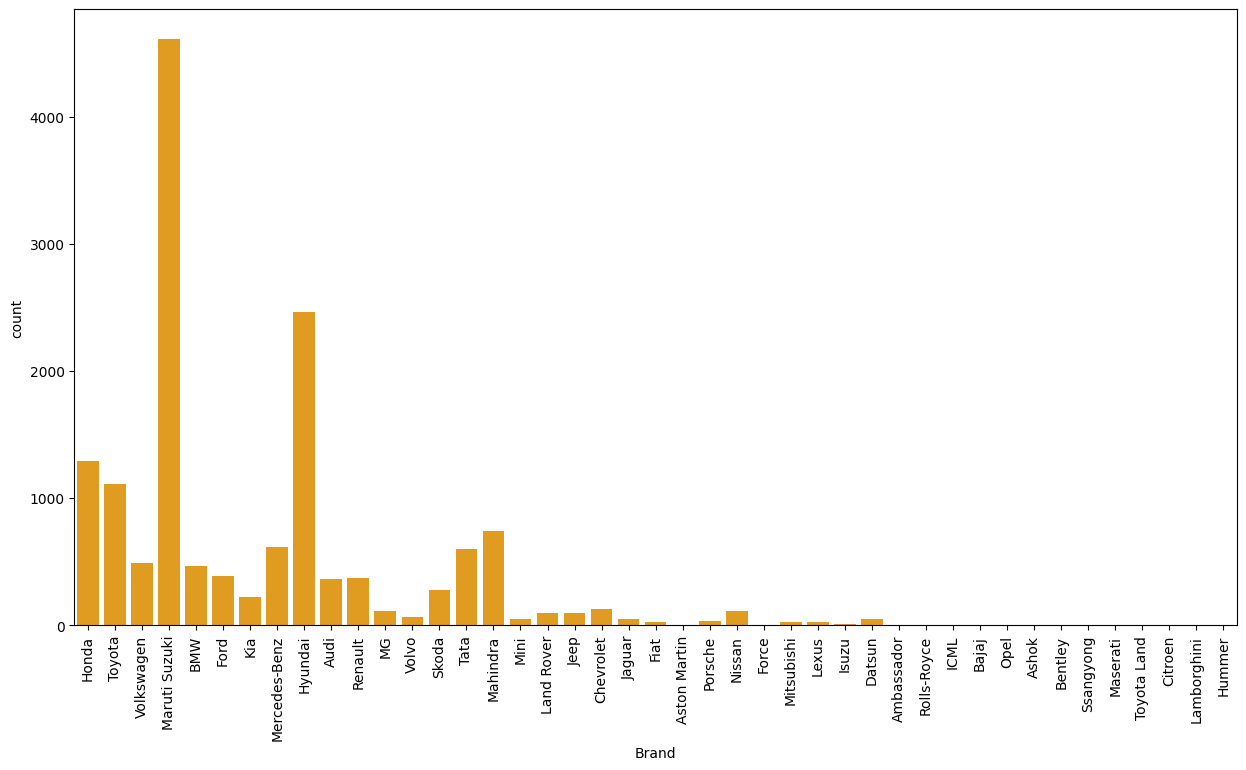

In [13]:
plt.figure(figsize=(15, 8))
sns.countplot(data = data, x = 'Brand', color='orange')
plt.xticks(rotation = 90)
plt.show()

<Axes: ylabel='Age'>

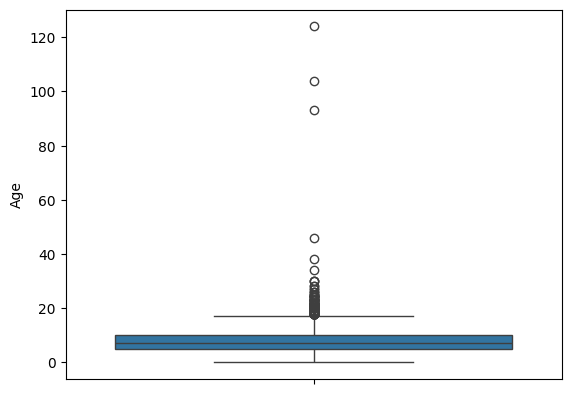

In [14]:
sns.boxplot(data['Age'])

In [15]:
# Q1 = data['Age'].quantile(0.25)
# Q3 = data['Age'].quantile(0.75)
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

In [16]:
# data = data[(data['Age'] >= lower_bound) & (data['Age'] <= upper_bound)]

In [17]:
# sns.boxplot(data['Age'])

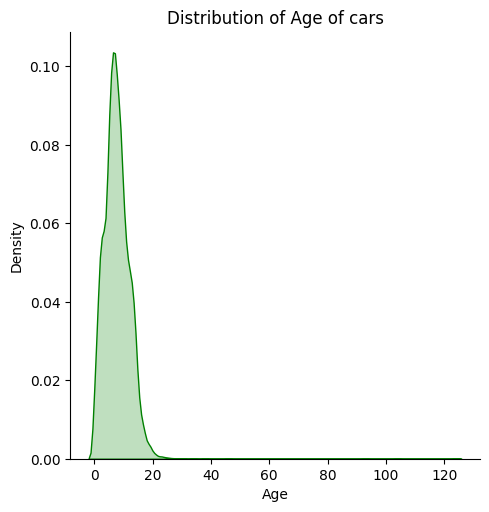

In [18]:
sns.displot(data['Age'], kind = 'kde', fill = True, color = 'green')
plt.title('Distribution of Age of cars')
plt.show()

<Axes: ylabel='kmDriven'>

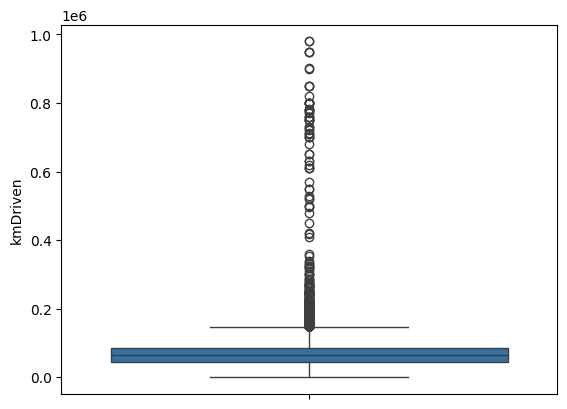

In [19]:
sns.boxplot(data['kmDriven'])

In [20]:
# Q1 = data['kmDriven'].quantile(0.25)
# Q3 = data['kmDriven'].quantile(0.75)
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # capping
# data['kmDriven'] = data['kmDriven'].apply(lambda x: lower_bound if x<lower_bound else upper_bound if x>upper_bound else x)

In [21]:
# sns.boxplot(data['kmDriven'])

In [22]:
data.head()

,Brand,model,Year,Age,kmDriven,Transmission,Owner,FuelType,PostedDate,AskPrice
0,Honda,City,2001,23,98000,Manual,second,Petrol,Nov-24,195000
1,Toyota,Innova,2009,15,190000,Manual,second,Diesel,Jul-24,375000
2,Volkswagen,VentoTest,2010,14,77246,Manual,first,Diesel,Nov-24,184999
3,Maruti Suzuki,Swift,2017,7,83500,Manual,second,Diesel,Nov-24,565000
4,Maruti Suzuki,Baleno,2019,5,45000,Automatic,first,Petrol,Nov-24,685000


<Axes: xlabel='count', ylabel='Transmission'>

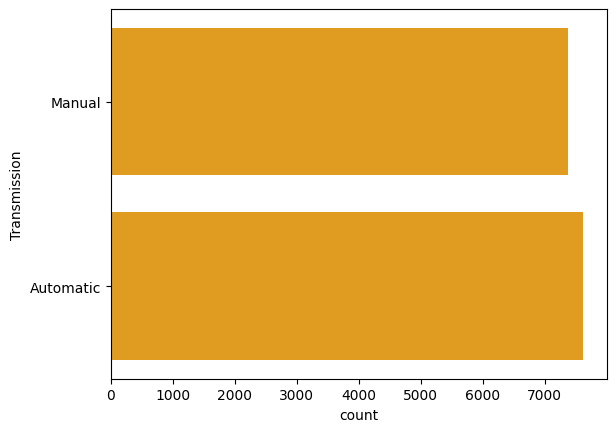

In [23]:
sns.countplot(data['Transmission'], color='orange')

<Axes: xlabel='count', ylabel='Owner'>

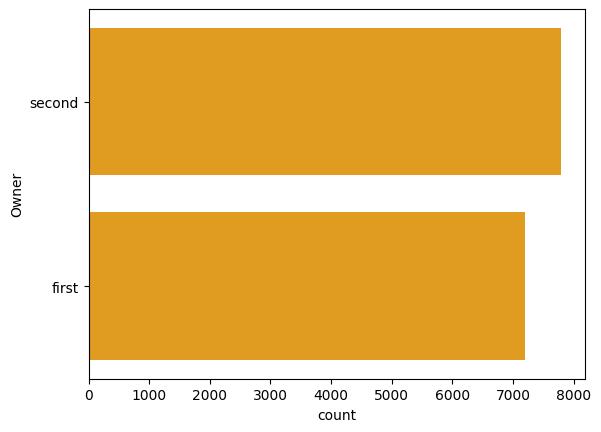

In [24]:
sns.countplot(data['Owner'], color='orange')

<Axes: xlabel='count', ylabel='FuelType'>

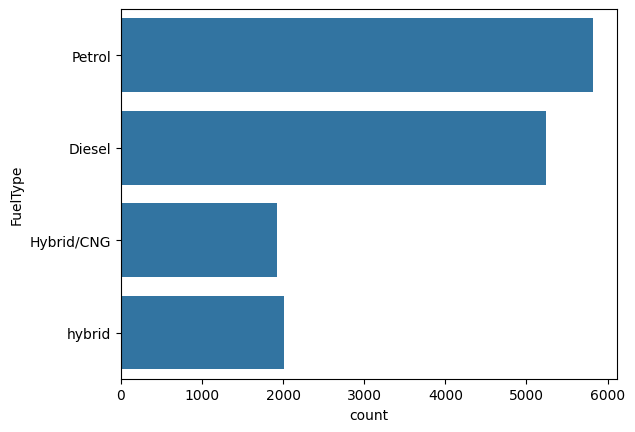

In [25]:
sns.countplot(data['FuelType'])

In [26]:
map_fuel = {'Petrol': 1, 'Diesel': 2, 'Hybrid/CNG': 3, 'hybrid': 4}
data['FuelType'] = data['FuelType'].map(map_fuel)

map_owner = {'second': 1, 'first': 2}
data['Owner'] = data['Owner'].map(map_owner)

map_transmission = {'Manual': 1, 'Automatic': 2}
data['Transmission'] = data['Transmission'].map(map_transmission)

In [27]:
data.drop(columns=['PostedDate'], inplace=True)
data.head()

,Brand,model,Year,Age,kmDriven,Transmission,Owner,FuelType,AskPrice
0,Honda,City,2001,23,98000,1,1,1,195000
1,Toyota,Innova,2009,15,190000,1,1,2,375000
2,Volkswagen,VentoTest,2010,14,77246,1,2,2,184999
3,Maruti Suzuki,Swift,2017,7,83500,1,1,2,565000
4,Maruti Suzuki,Baleno,2019,5,45000,2,2,1,685000


In [28]:
data.drop(columns=['Year'], inplace=True)
data.head()

,Brand,model,Age,kmDriven,Transmission,Owner,FuelType,AskPrice
0,Honda,City,23,98000,1,1,1,195000
1,Toyota,Innova,15,190000,1,1,2,375000
2,Volkswagen,VentoTest,14,77246,1,2,2,184999
3,Maruti Suzuki,Swift,7,83500,1,1,2,565000
4,Maruti Suzuki,Baleno,5,45000,2,2,1,685000


## Splitting Data into Train and Test data

In [29]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

numeric_features = [2, 3]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_features = [0, 1]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
])

preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 [2, 3]),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 [0, 1])])

In [32]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Desition Tree': DecisionTreeRegressor(), 
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'SVR': SVR()
}

# Evaluate models
results = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    }
    
    print(f"{name}:")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  MAE: {mae:.2f}")
    print(f"  R2: {r2:.2f}")
    print()

# Find best model based on R2 score
# best_model_name = max(results, key=lambda x: results[x]['R2'])
# best_model_score = results[best_model_name]['R2']
# print(f"Best model: {best_model_name} with R2 score: {best_model_score:.2f}")

Random Forest:
  RMSE: 409703.08
  MAE: 162423.30
  R2: 0.92

Gradient Boosting:
  RMSE: 665054.68
  MAE: 354446.50
  R2: 0.78

Desition Tree:
  RMSE: 541034.14
  MAE: 191211.69
  R2: 0.86

Linear Regression:
  RMSE: 635601.42
  MAE: 286314.69
  R2: 0.80

Ridge:
  RMSE: 643183.80
  MAE: 297909.31
  R2: 0.80



C:\Users\mnrth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2028201615287640.5, tolerance: 3168162101463.4824
  model = cd_fast.sparse_enet_coordinate_descent(


Lasso:
  RMSE: 634464.88
  MAE: 284193.95
  R2: 0.80

SVR:
  RMSE: 1489496.60
  MAE: 653891.76
  R2: -0.10



## Model Selection: Random Forest

In [33]:
# from sklearn.model_selection import GridSearchCV
pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(random_state=42))]
                   )

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('rmse', rmse)
print('r2', r2)

rmse 409703.08262831724
r2 0.9169210149076261


### Model Saving

In [34]:
import pickle

pickle.dump(data, open('data.pkl', 'wb'))
pickle.dump(pipeline, open('model.pkl', 'wb'))